### ignore warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Basic libraries to manipulate data

In [46]:
import matplotlib.pyplot as plt   #matplotlib for data visualization 
import numpy as np   # numpy for numerical computations
import pandas as pd   # pandas for data manipulations
import seaborn as sns
import plotly.express as px 

### Database path

In [13]:
# Specify the path to the database
data_path = "./data/"

# Specify the filenames of the datasets
shopping_filename = "shopping_trends_team_assignment.csv"

# Read the csv files and create backup copies
shopping_df_data = pd.read_csv(data_path + shopping_filename)

# Create working copies of the dataframes for analysis
shopping_df = shopping_df_data.copy()

# Option to display all columns 
pd.set_option('display.max_columns', None)
shopping_df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1757,1758,19,Male,Dress,Clothing,94,Michigan,L,Yellow,Fall,3.6,No,Standard,No,No,48,Debit Card,Annually
300,301,29,Male,Hat,Accessories,98,Iowa,M,Teal,Spring,4.4,Yes,Store Pickup,Yes,Yes,24,PayPal,Weekly
3172,3173,57,Female,Socks,Clothing,52,Missouri,M,Olive,Fall,3.7,No,Standard,No,No,30,Debit Card,Bi-Weekly
3411,3412,29,Female,Shoes,Footwear,56,New York,L,Gray,Winter,4.9,No,2-Day Shipping,No,No,45,Cash,Weekly
2918,2919,19,Female,Sunglasses,Accessories,73,New York,S,Black,Fall,4.9,No,Free Shipping,No,No,36,Cash,Weekly


### Checking for missing values

In [14]:
missing_values = shopping_df.isnull().sum()
missing_values

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Checking for duplicate entries

In [15]:
duplicate_rows = shopping_df.duplicated().sum()
duplicate_rows

0

### Check datatypes

In [16]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [17]:
shopping_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Converting datatypes

In [18]:
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Payment Method', 'Frequency of Purchases']
boolean_columns = ['Subscription Status', 'Discount Applied', 'Promo Code Used']

for col in categorical_columns:
    shopping_df[col] = shopping_df[col].astype('category')

for col in boolean_columns:
    shopping_df[col] = shopping_df[col].map({'Yes': True, 'No': False})

### Datatype validation

In [19]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   category
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   category
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   bool    
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   bool    
 14  Promo Code Used         

### Data Exploration

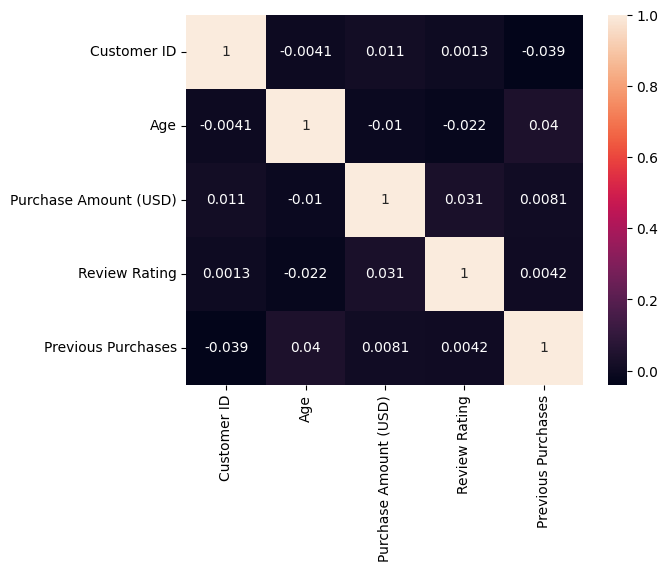

In [55]:
numeric_df = shopping_df.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_df.corr() 
sns.heatmap(correlation_matrix, annot=True) 

plt.show() 

In [56]:
# Analysis of categorical variables 
for col in shopping_df.select_dtypes(include=['category']).columns: 
    print(f"\nFrequency of {col}:\n{shopping_df[col].value_counts()}") 


Frequency of Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Frequency of Item Purchased:
Item Purchased
Jewelry       171
Blouse        171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Frequency of Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Frequency of Location:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nevada            87
Nebraska          87
New York          87
Delaware          86
Maryland    

In [57]:
# categorical columns - top 5 entries 
categorical_columns = shopping_df.select_dtypes(include='category').columns 

for column in categorical_columns: 
    print(f"Top 5 entries in {column}:") 
    top_five = shopping_df[column].value_counts().head(5) 
    print(top_five) 
    print() 

Top 5 entries in Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Top 5 entries in Item Purchased:
Item Purchased
Jewelry    171
Blouse     171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

Top 5 entries in Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Top 5 entries in Location:
Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: count, dtype: int64

Top 5 entries in Size:
Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

Top 5 entries in Color:
Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

Top 5 entries in Season:
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

Top 5 entries in Shipping Type:
Shipping Type
Free Shipping    675
Standard         654
Store Pickup     650
Next Day Air     648

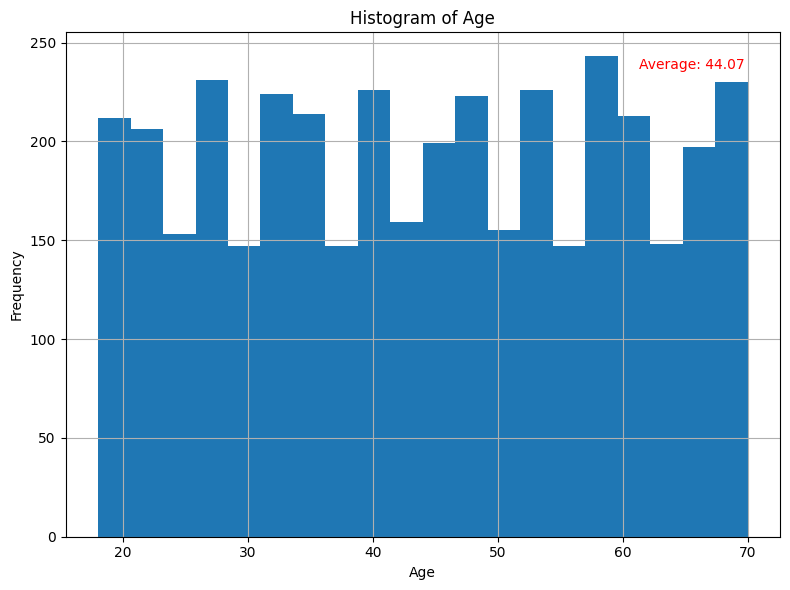

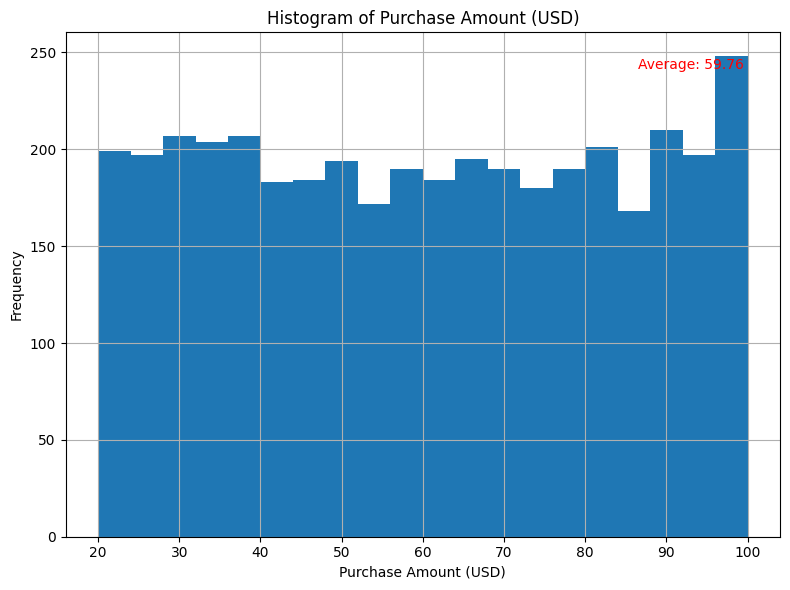

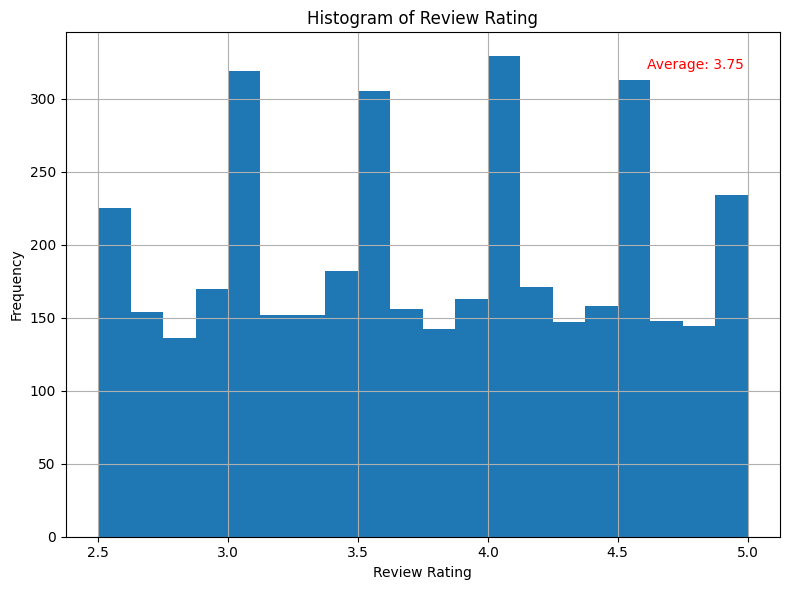

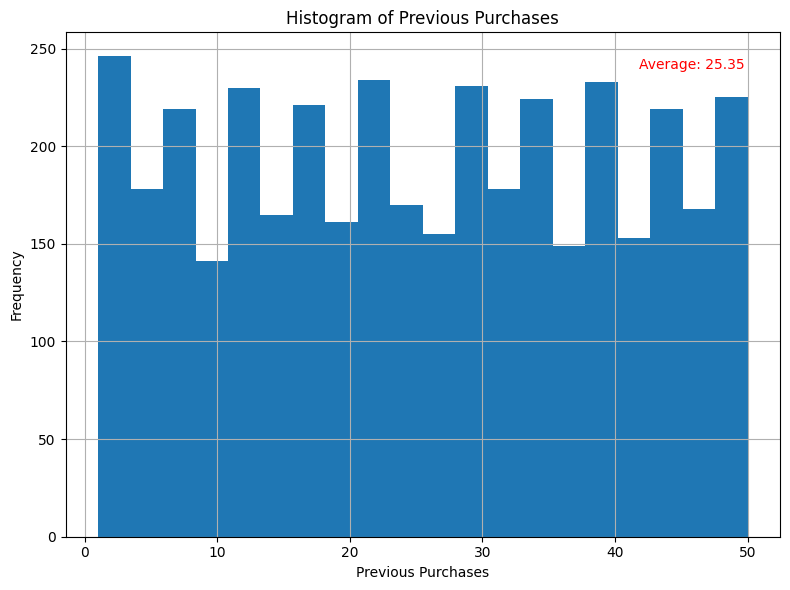

In [58]:
# Analysis of numerical variables
numeric_columns = shopping_df.select_dtypes(include=[np.number]).drop('Customer ID', axis=1)

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    numeric_columns[column].hist(bins=20)
    
    mean_value = numeric_columns[column].mean()
    
    plt.text(0.95, 0.95, f'Average: {mean_value:.2f}', transform=plt.gca().transAxes,
             horizontalalignment='right', verticalalignment='top', fontsize=10, color='red')
    
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Big conclusion on all of the data cleaning and descriptives: Mariana is doing this

# Hypotheses

# Gender --> dig deeper and write conclusions: 

### Hypothesis 1: Gender significantly influences the review ratings of purchased items, with one gender possibly giving consistently higher or lower ratings than the other.

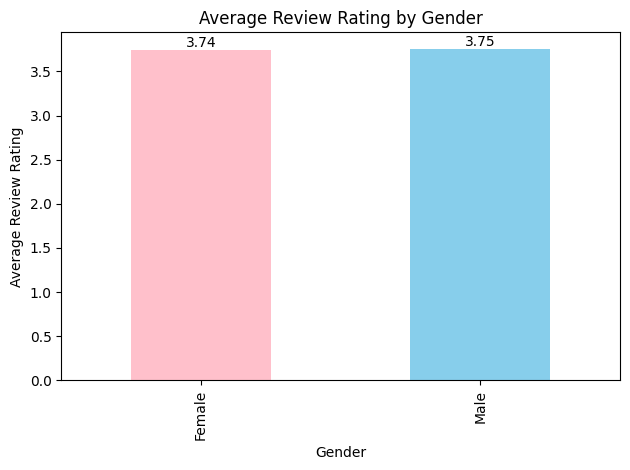

In [36]:
gender_review_rating = shopping_df.groupby('Gender')['Review Rating'].mean().sort_values() 

ax = gender_review_rating.plot(kind='bar', title='Average Review Rating by Gender', color=['pink', 'skyblue']) 
plt.xlabel('Gender') 
plt.ylabel('Average Review Rating') 

for i in ax.patches: 
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(),  
            f'{i.get_height():.2f}', ha='center', va='bottom') 

plt.tight_layout() 
plt.show() 

### Hypothesis 2: The purchase amount differs by gender, with one gender making purchases more frequently than the other.

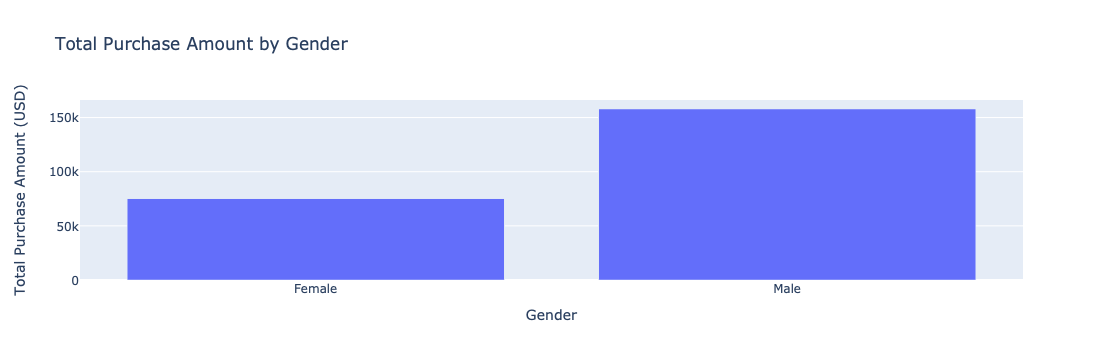

In [48]:
gender_purchase_totals = shopping_df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index() 

fig = px.bar(gender_purchase_totals, x='Gender', y='Purchase Amount (USD)',  
             title='Total Purchase Amount by Gender', 
             labels={'Purchase Amount (USD)': 'Total Purchase Amount (USD)'}) 

fig.show() 

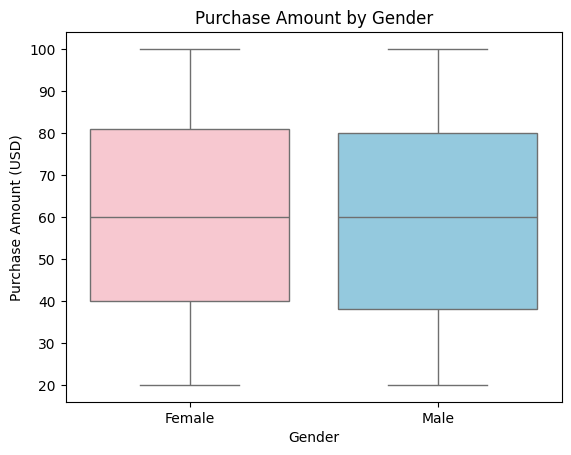

In [49]:
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=shopping_df, 
            palette={'Male': 'skyblue', 'Female': 'pink'})
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

### Hypothesis 3: The frequency of purchases differs by gender, with one gender making purchases more frequently than the other.

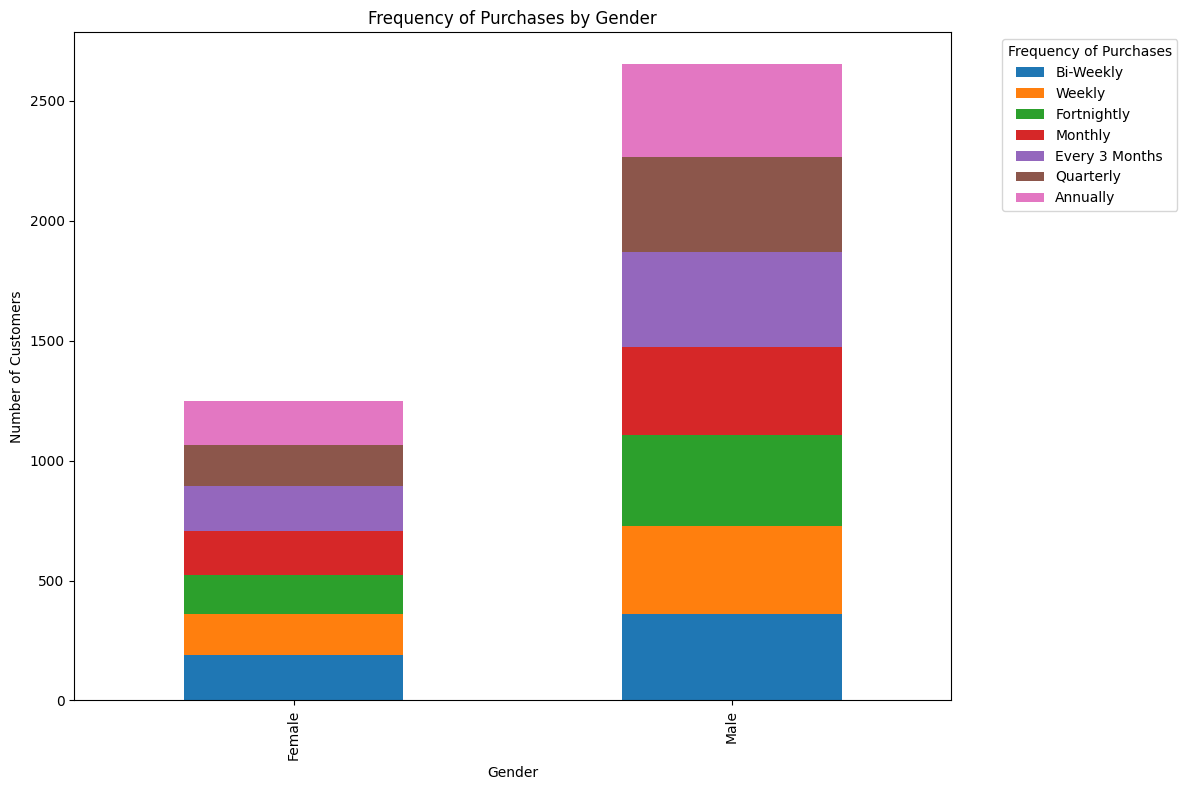

In [50]:
# Define the new order for the frequency of purchases
new_order = ['Bi-Weekly', 'Weekly', 'Fortnightly', 'Monthly', 'Every 3 Months', 'Quarterly', 'Annually']

# Group the data by 'Gender' and 'Frequency of Purchases', then count the number of occurrences
gender_freq_purchases = shopping_df.groupby(['Gender', 'Frequency of Purchases']).size().unstack()

# Reorder the columns based on the new order
gender_freq_purchases = gender_freq_purchases[new_order]

# Plot the frequency of purchases by Gender using the new order
ax = gender_freq_purchases.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Frequency of Purchases by Gender')
plt.ylabel('Number of Customers')
plt.xlabel('Gender')

# Adjust the legend to match the new order
plt.legend(title='Frequency of Purchases', labels=new_order, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Hypothesis 4: Gender has an impact on type of items purchase

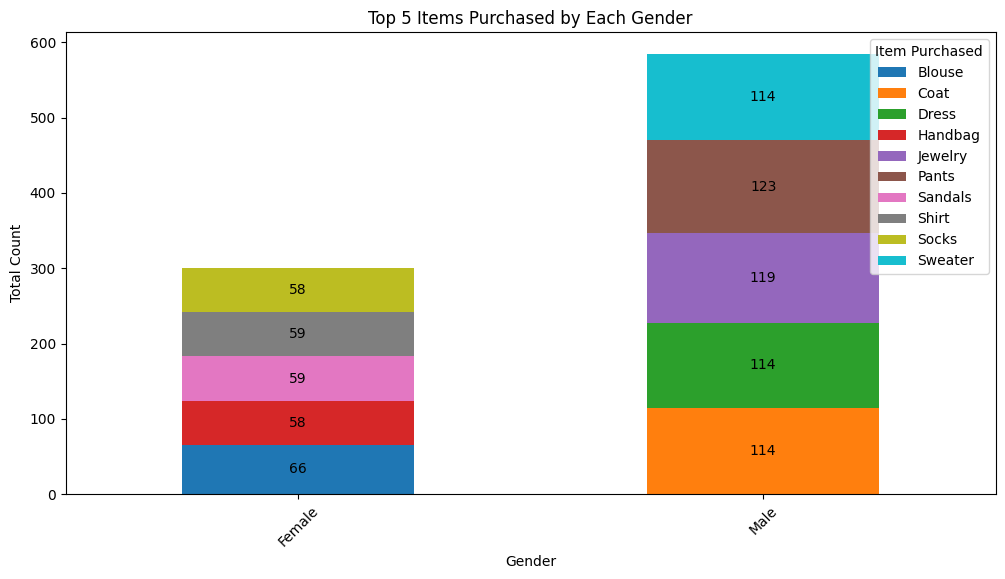

In [52]:
top_items_by_gender = shopping_df.groupby(['Gender', 'Item Purchased']).size().unstack(fill_value=0) 
top_items_by_gender = top_items_by_gender.apply(lambda x: x.nlargest(5), axis=1) 

ax = top_items_by_gender.plot(kind='bar', stacked=True, figsize=(12, 6)) 

plt.title('Top 5 Items Purchased by Each Gender') 
plt.xlabel('Gender') 
plt.ylabel('Total Count') 
plt.xticks(rotation=45) 
plt.legend(title='Item Purchased', loc='upper right') 

for p in ax.patches: 
    width = p.get_width() 
    height = p.get_height() 
    x, y = p.get_xy() 
    if height > 0:  # Only add labels to non-zero values 
        ax.text(x + width/2, y + height/2, int(height), horizontalalignment='center', verticalalignment='center') 

plt.show() 

# Location --> dig deeper and write conclusions: 

### Observations of Geographical Data

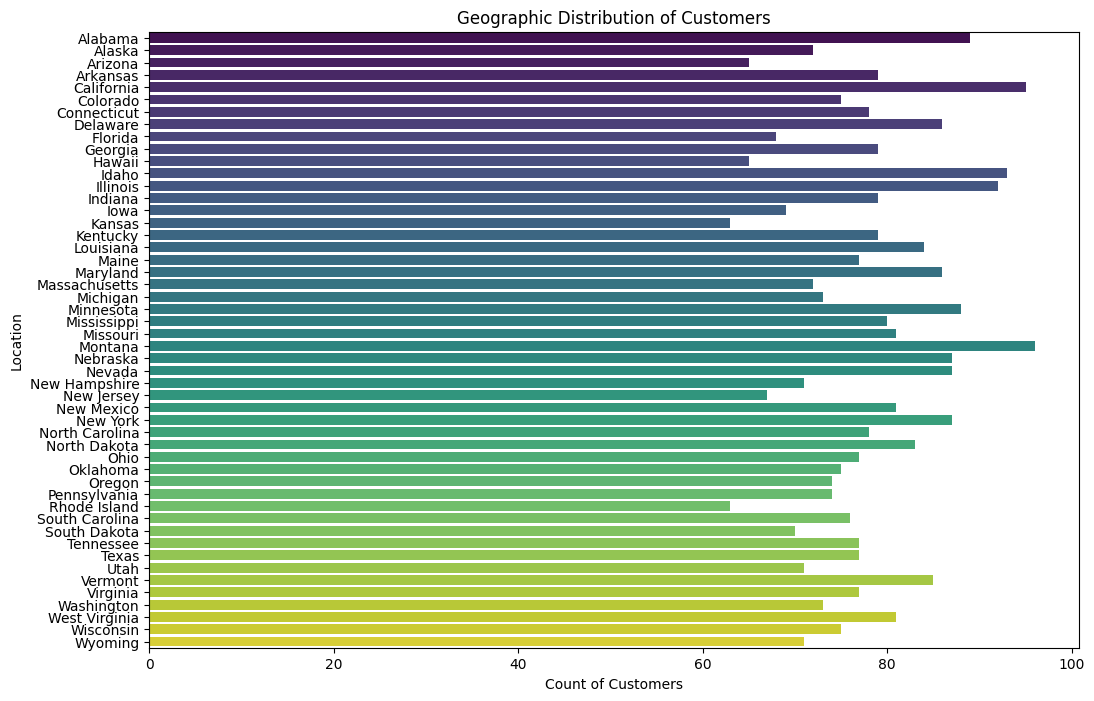

,Location,Count
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89
5,Minnesota,88
6,Nevada,87
7,Nebraska,87
8,New York,87
9,Delaware,86


In [53]:
# Geographical distribution of customers
location_distribution = shopping_df['Location'].value_counts() 
location_list = location_distribution.reset_index() 
location_list.columns = ['Location', 'Count'] 

plt.figure(figsize=(12, 8)) 
sns.barplot(x='Count', y='Location', data=location_list, palette='viridis') 
plt.title("Geographic Distribution of Customers") 
plt.xlabel("Count of Customers") 
plt.ylabel("Location") 
plt.show() 

location_list 

In [54]:
# Creating regions
updated_state_to_region = { 
    # Region 1: Northeast 
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',  
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',  
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 

    # Region 2: Midwest 
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',  
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest',  
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',  
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 

    # Region 3: South 
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',  
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',  
    'Virginia': 'South', 'West Virginia': 'South', 'Alabama': 'South',  
    'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South',  
    'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South', 
  
    # Region 4: West 
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',  
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West',  
    'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West',  
    'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West' 
} 

shopping_df['Region'] = shopping_df['Location'].map(updated_state_to_region) 
shopping_df['Region'] = shopping_df['Region'].astype('category') 

shopping_df 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,True,Express,True,True,14,Venmo,Fortnightly,South
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,True,Express,True,True,2,Cash,Fortnightly,Northeast
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,True,Free Shipping,True,True,23,Credit Card,Weekly,Northeast
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,True,Next Day Air,True,True,49,PayPal,Weekly,Northeast
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,True,Free Shipping,True,True,31,PayPal,Annually,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,False,2-Day Shipping,False,False,32,Venmo,Weekly,South
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,False,Store Pickup,False,False,41,Bank Transfer,Bi-Weekly,Midwest
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,False,Standard,False,False,24,Venmo,Quarterly,Northeast
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,False,Express,False,False,24,Venmo,Weekly,Midwest


### Hypothesis 1: Seasonal purchase patterns vary by location, with customers in some locations spending more during specific seasons compared to others.

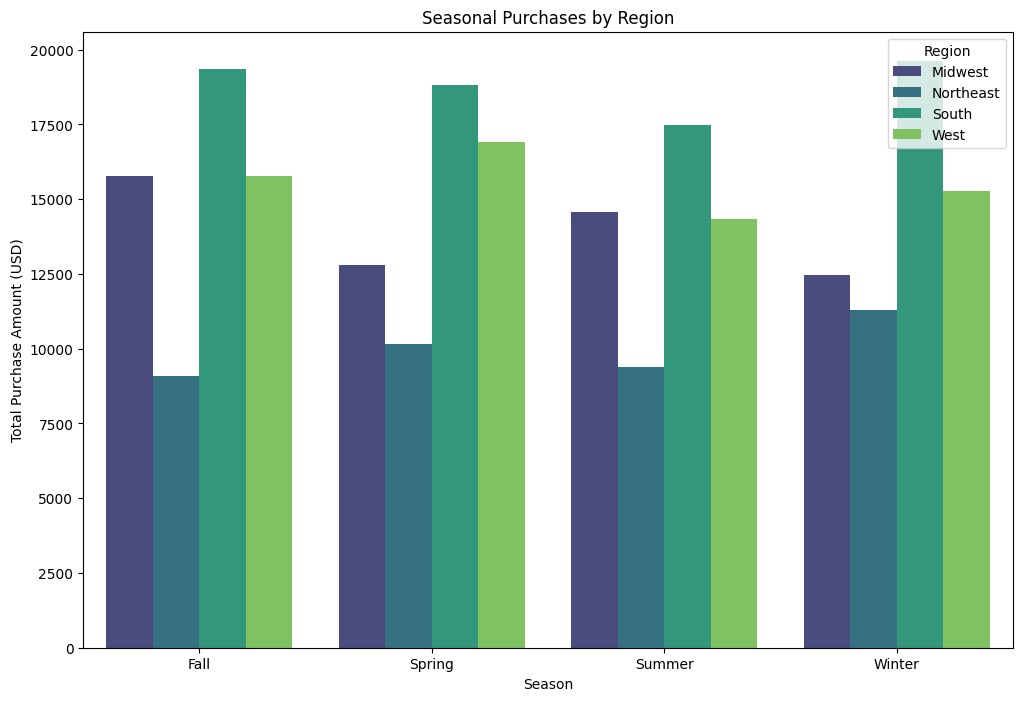

In [59]:
season_region_purchase = shopping_df.groupby(['Region', 'Season'])['Purchase Amount (USD)'].sum().reset_index() 
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Region', data=season_region_purchase, palette='viridis') 
plt.title('Seasonal Purchases by Region') 
plt.xlabel('Season') 
plt.ylabel('Total Purchase Amount (USD)') 
plt.legend(title='Region') 

plt.show() 

### Hypothesis 2: The location of a customer has a significant impact on the usage of promo codes, with customers from certain locations using promo codes more frequently than others.

<Figure size 1200x800 with 0 Axes>

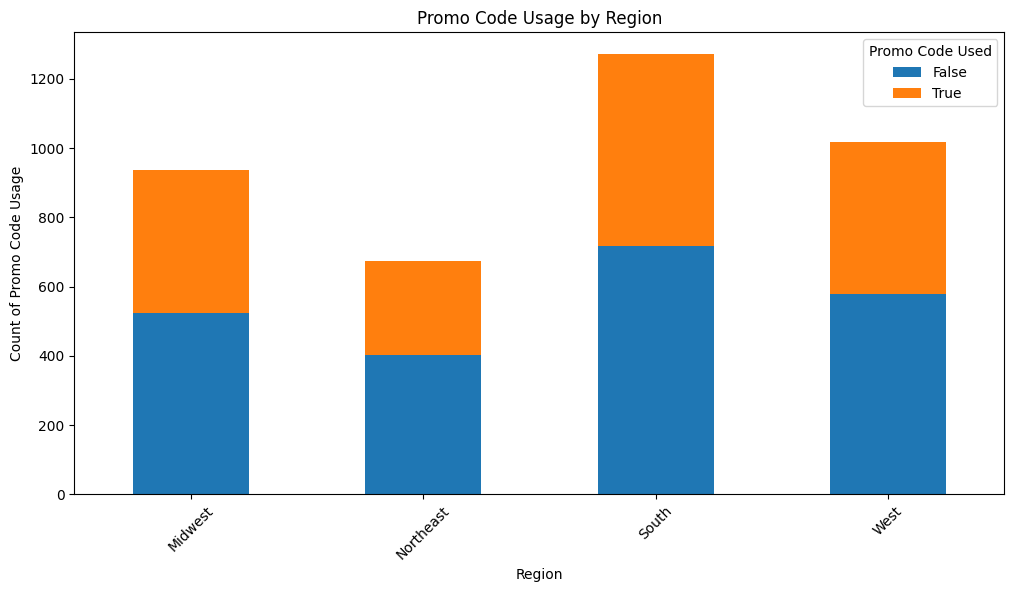

In [60]:
promo_code_usage_by_region = shopping_df.groupby(['Region', 'Promo Code Used']).size().unstack(fill_value=0).reset_index() 

plt.figure(figsize=(12, 8)) 
promo_code_usage_by_region.set_index('Region').plot(kind='bar', stacked=True, figsize=(12, 6)) 
plt.title('Promo Code Usage by Region') 
plt.xlabel('Region') 
plt.ylabel('Count of Promo Code Usage') 
plt.legend(title='Promo Code Used', loc='upper right') 
plt.xticks(rotation=45) 

plt.show() 

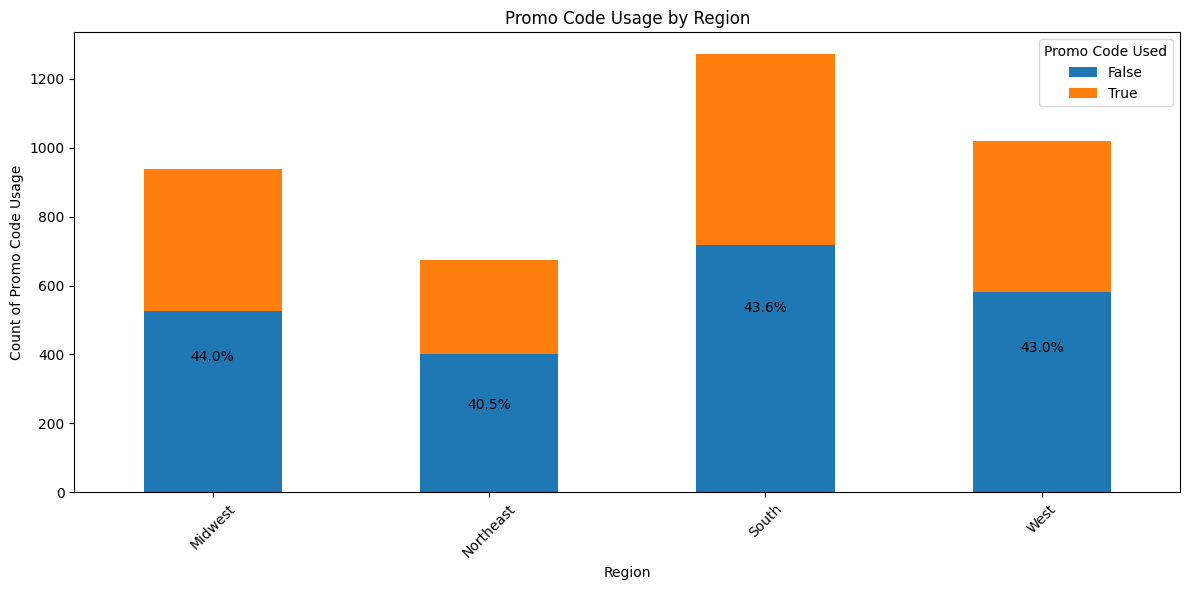

In [66]:
promo_code_usage_by_region = shopping_df.groupby(['Region', 'Promo Code Used']).size().unstack(fill_value=0)

# Calculate percentages for True usage
promo_code_usage_by_region['Percentage True'] = (
    promo_code_usage_by_region[True] / promo_code_usage_by_region.sum(axis=1)
) * 100

# Plot the stacked bar chart
ax = promo_code_usage_by_region.drop('Percentage True', axis=1).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Promo Code Usage by Region')
plt.xlabel('Region')
plt.ylabel('Count of Promo Code Usage')
plt.legend(title='Promo Code Used', loc='upper right')
plt.xticks(rotation=45)

# Annotate the percentage on top of the 'True' bars
for idx, val in enumerate(promo_code_usage_by_region['Percentage True']):
    plt.text(idx, promo_code_usage_by_region[True][idx], f'{val:.1f}%', ha='center', va='top')

plt.tight_layout()
plt.show()

### Hypothesis 3: top 5 items purchased per region 

In [63]:
for region, items in top_5_items_per_region.items():
    item_list = '\n'.join(f"{idx + 1}. {item}" for idx, item in enumerate(items))
    print(f"{region}:\n{item_list}\n")

Midwest:
1. Sandals
2. Jacket
3. Jewelry
4. Skirt
5. Belt

Northeast:
1. Blouse
2. Shoes
3. Coat
4. Pants
5. Dress

South:
1. Hoodie
2. Dress
3. Jewelry
4. Hat
5. Pants

West:
1. Backpack
2. Belt
3. Shirt
4. Coat
5. Sneakers



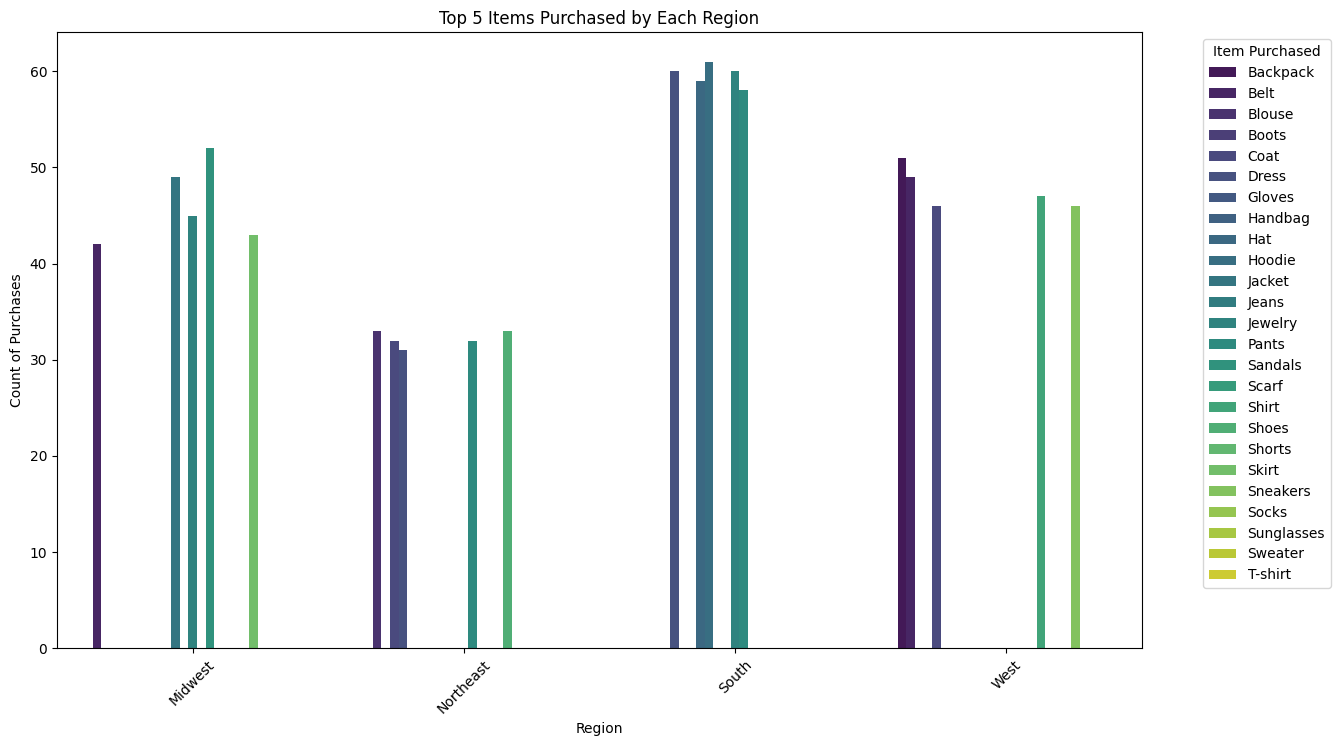

In [61]:
item_counts_by_region = shopping_df.groupby(['Region', 'Item Purchased']).size().reset_index(name='Count') 

top_items_by_region = item_counts_by_region.groupby('Region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True) 

plt.figure(figsize=(14, 8)) 
sns.barplot(x='Region', y='Count', hue='Item Purchased', data=top_items_by_region, palette='viridis') 
plt.title('Top 5 Items Purchased by Each Region') 
plt.xlabel('Region') 
plt.ylabel('Count of Purchases') 
plt.legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=45) 
plt.show() 

In [62]:
# Group by 'Region' and 'Item Purchased' and count the number of occurrences
item_counts_by_region = shopping_df.groupby(['Region', 'Item Purchased']).size().reset_index(name='Count')

# Get the top 5 items for each region
top_items_by_region = item_counts_by_region.groupby('Region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Create a dictionary to hold the top 5 items for each region
top_5_items_per_region = top_items_by_region.groupby('Region')['Item Purchased'].apply(list).to_dict()

for region, items in top_5_items_per_region.items():
    print(f"{region}: {items}")

Midwest: ['Sandals', 'Jacket', 'Jewelry', 'Skirt', 'Belt']
Northeast: ['Blouse', 'Shoes', 'Coat', 'Pants', 'Dress']
South: ['Hoodie', 'Dress', 'Jewelry', 'Hat', 'Pants']
West: ['Backpack', 'Belt', 'Shirt', 'Coat', 'Sneakers']


# Hypothesis 4: age and purchase titles --> dig deeper into age and write conclusions: 

Age
69    88
57    87
41    86
25    85
49    84
Name: count, dtype: int64


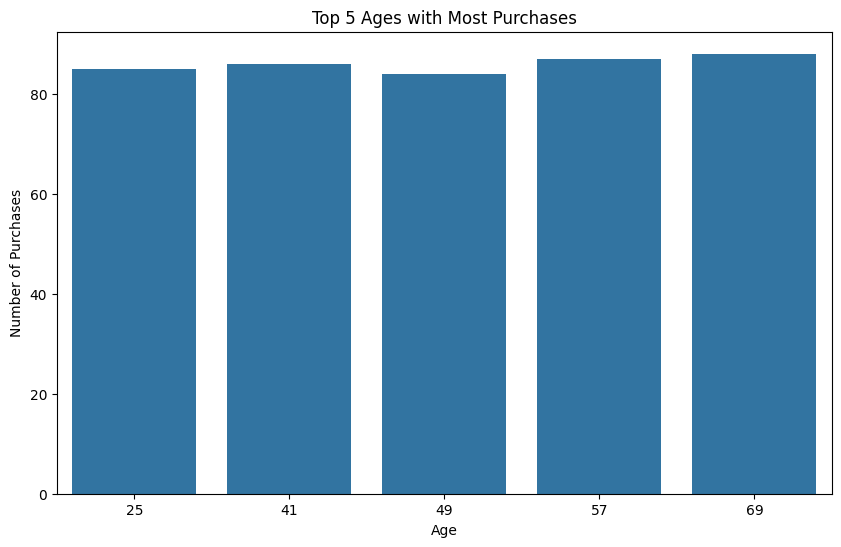

In [70]:
top_five_ages = shopping_df['Age'].value_counts().head(5)
print(top_five_ages)
top_five_ages = shopping_df['Age'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_five_ages.index, y=top_five_ages.values)
plt.title('Top 5 Ages with Most Purchases')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()

# CREATE DASHBOARD: Ishan